# Topic modelling of Lenovo mobile reviews (LDA)

In [34]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [35]:
import pandas as pd

In [36]:
columns_to_drop = ['date', 'developerResponse', 'rating', 'isEdited', 'title', 'userName', 'Unnamed: 0']
review_data = pd.read_csv('data/AppStoreData.csv').drop(columns_to_drop,axis=1)
review_data.head()

,review
0,Great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin..."
2,Notice that the drop in interest rate of 0.8% ...
3,Sending money into my GXS account is a breeze ...
4,I have to say that the UI/UX is one of the bes...


In [37]:
review_data.shape

# We have 14K reviews 

(130, 1)

# Data Pre-Processing
### 1. Replacing/Dropping NULL values

In [38]:
review_data.isnull().sum()

# Since our data has no null values will be skip this step

review    0
dtype: int64

### 2. Converting to LOWER case

In [39]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...","a bank like no other, no bank have such amazin..."
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of 0.8% ...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui/ux is one of the bes...


### 3. REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS)

In [40]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...",a bank like no other no bank have such amazin...
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of ...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui ux is one of the bes...


### 4. REMOVING WHITE SPACE

In [41]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...",a bank like no other no bank have such amazing...
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of in sa...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui ux is one of the bes...


### 5. WORD TOKENIZATION

In [42]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/neleht./nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, app, with, attractive, intere..."
1,"A bank like no other, no bank have such amazin...","[a, bank, like, no, other, no, bank, have, suc..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, that, the, drop, in, interest, rate, ..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, into, my, gxs, account, is, a..."
4,I have to say that the UI/UX is one of the bes...,"[i, have, to, say, that, the, ui, ux, is, one,..."


### 6. REMOVE UNNECESSARY WORDS

In [44]:
!pip install stopwords

In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neleht./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
review_data.head()


,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, attractive, interest, rates, ..."
1,"A bank like no other, no bank have such amazin...","[bank, like, bank, amazing, feature, separate,..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, saving, account..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, account, breeze, instantaneou..."
4,I have to say that the UI/UX is one of the bes...,"[best, seen, digibank, mobile, finally, strong..."


In [47]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

### 7. LEMMATIZATION

In [48]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/neleht./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, attractive, interest, rate, p..."
1,"A bank like no other, no bank have such amazin...","[bank, like, bank, amazing, feature, separate,..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, saving, account..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, account, breeze, instantaneou..."
4,I have to say that the UI/UX is one of the bes...,"[best, seen, digibank, mobile, finally, strong..."


### 8. Extracting only NOUN

In [50]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/neleht./nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [52]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [53]:
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe..."
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason..."
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ..."
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust..."


### 9. Document Term Matrix

In [54]:
import gensim
from gensim import corpora

In [55]:
dictionary = corpora.Dictionary(review_data['clean_review'])
print(dictionary)

# We have 6724 unique tokens

Dictionary(366 unique tokens: ['account', 'apple', 'banking', 'card', 'debit']...)


In [56]:
doc_term_matrix = review_data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and thier count in corpus

0    [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1    [(5, 3), (9, 1), (10, 3), (11, 1), (12, 1), (1...
2    [(0, 9), (5, 7), (9, 6), (10, 1), (34, 1), (35...
3    [(0, 2), (2, 1), (8, 1), (23, 2), (30, 1), (43...
4    [(2, 1), (8, 1), (10, 1), (26, 1), (33, 1), (6...
5    [(0, 1), (10, 4), (42, 1), (61, 1), (83, 1), (...
6    [(2, 1), (5, 1), (9, 1), (10, 1), (32, 1), (74...
7    [(2, 1), (7, 1), (10, 3), (17, 1), (23, 1), (3...
8    [(17, 1), (25, 1), (32, 1), (33, 1), (74, 1), ...
9    [(0, 2), (6, 1), (8, 1), (10, 3), (21, 1), (56...
Name: clean_review, dtype: object

### LDA

In [57]:
from IPython.display import clear_output

In [58]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [59]:
ldamodel.print_topics()

# We have printed all 12 topics and their keywords generated by LDA

[(0,
  '0.040*"experience" + 0.040*"digital" + 0.040*"bank" + 0.027*"fund" + 0.027*"interest" + 0.027*"account" + 0.027*"offer" + 0.014*"access" + 0.014*"banking" + 0.014*"singtel"'),
 (1,
  '0.075*"wait" + 0.046*"write" + 0.031*"rate" + 0.031*"phone" + 0.031*"problem" + 0.016*"told" + 0.016*"grab" + 0.016*"dark" + 0.016*"staff" + 0.016*"risk"'),
 (2,
  '0.043*"bank" + 0.029*"account" + 0.029*"money" + 0.029*"repayment" + 0.022*"transfer" + 0.022*"trust" + 0.022*"time" + 0.015*"ease" + 0.015*"singapore" + 0.015*"grab"'),
 (3,
  '0.060*"user" + 0.037*"design" + 0.025*"service" + 0.025*"navigate" + 0.025*"device" + 0.025*"pocket" + 0.025*"grow" + 0.025*"money" + 0.024*"experience" + 0.013*"lack"'),
 (4,
  '0.117*"interest" + 0.101*"pocket" + 0.071*"rate" + 0.054*"love" + 0.029*"money" + 0.027*"feature" + 0.027*"bank" + 0.027*"wait" + 0.025*"user" + 0.022*"goal"'),
 (5,
  '0.050*"user" + 0.050*"something" + 0.026*"singpass" + 0.026*"information" + 0.013*"interest" + 0.013*"rate" + 0.013*"

### Visualizing LDA model topics

In [60]:
import pyLDAvis # To visualize lda model
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.101591  0.093240       1        1  21.220972
2      0.104093 -0.032473       2        1  13.000833
4     -0.137718  0.165343       3        1  10.697922
10     0.123153  0.060680       4        1   9.242775
11     0.081004  0.028750       5        1   8.601844
6     -0.080163 -0.060060       6        1   6.456987
5     -0.043338 -0.056240       7        1   6.142663
3     -0.116749  0.033875       8        1   6.039286
0      0.010449 -0.008979       9        1   5.656403
9     -0.012331 -0.045481      10        1   5.121168
1     -0.010476 -0.041313      11        1   4.702900
8     -0.019514 -0.137342      12        1   3.116247, topic_info=         Term       Freq      Total Category  logprob  loglift
25     pocket  11.000000  11.000000  Default  30.0000  30.0000
5    interest  24.000000  24.000000  Default  29.0000  29.0000
33       wait   9.000000   9.000000  Default  28.0000  28.0000
0     account  25.000000  25.000000  Default  27.0000  27.0000
9        rate  17.000000  17.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
119     touch   0.042167   2.805792  Topic12  -6.4393  -0.7293
69       time   0.042272  10.047532  Topic12  -6.4368  -2.0024
23      money   0.042223  13.053996  Topic12  -6.4379  -2.2653
30   transfer   0.042196   8.042109  Topic12  -6.4386  -1.7816
7       payee   0.042113   5.940866  Topic12  -6.4405  -1.4807

[530 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
168       8  0.776597   abrupt
284       1  0.665405   accept
344       4  0.494574   access
344       9  0.494574   access
0         1  0.509185  account
...     ...       ...      ...
312       1  0.251342    write
312       3  0.251342    write
312      11  0.502684    write
146       2  0.466996     year
146       5  0.466996     year

[565 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 3, 5, 11, 12, 7, 6, 4, 1, 10, 2, 9])

Since, some topics in above graph are overlapping each other we will try to find optimal number of topics.

In [61]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())

# Compute Coherence Score


Coherence Score:  0.4100970154148364


In [62]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [63]:
topic_num,cv_score = calculate_topic_cv(ldamodel,review_data['clean_review'],dictionary,15)

In [64]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
10,0.464836
7,0.461642
14,0.447155
11,0.439995
8,0.439746
6,0.433380
3,0.420038
12,0.410097
9,0.406801


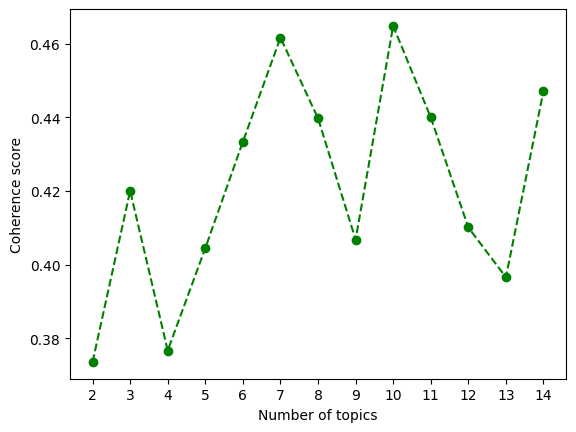

In [65]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

### we will be going with number of topic 6 as with 8 topics there will be many overlaps .

In [66]:
# Creating LDA model with number of topics as 6

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.4333800426698224


In [67]:
ldamodel.print_topics()

[(0,
  '0.041*"bank" + 0.027*"review" + 0.022*"experience" + 0.022*"user" + 0.022*"account" + 0.022*"fast" + 0.022*"money" + 0.021*"digital" + 0.016*"application" + 0.016*"issue"'),
 (1,
  '0.045*"wait" + 0.036*"write" + 0.019*"launch" + 0.019*"response" + 0.014*"rate" + 0.010*"time" + 0.010*"review" + 0.010*"update" + 0.010*"store" + 0.010*"build"'),
 (2,
  '0.080*"bank" + 0.018*"fast" + 0.018*"trust" + 0.018*"singapore" + 0.013*"banking" + 0.013*"account" + 0.013*"ease" + 0.013*"joke" + 0.013*"nothing" + 0.013*"quick"'),
 (3,
  '0.037*"pocket" + 0.034*"money" + 0.029*"account" + 0.028*"user" + 0.023*"transfer" + 0.023*"time" + 0.023*"payee" + 0.023*"design" + 0.022*"feature" + 0.017*"love"'),
 (4,
  '0.083*"interest" + 0.048*"rate" + 0.037*"bank" + 0.034*"pocket" + 0.022*"sign" + 0.016*"love" + 0.016*"user" + 0.013*"money" + 0.013*"loan" + 0.013*"feature"'),
 (5,
  '0.081*"account" + 0.043*"interest" + 0.041*"rate" + 0.018*"consumer" + 0.018*"money" + 0.018*"time" + 0.017*"grab" + 0.

In [68]:
pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.086445 -0.061245       1        1  21.776688
5      0.081317 -0.078037       2        1  20.698429
2     -0.125015 -0.068487       3        1  20.415167
0     -0.049766  0.084935       4        1  15.695906
3      0.071404  0.112040       5        1  14.200717
1     -0.064386  0.010795       6        1   7.213092, topic_info=            Term       Freq      Total Category  logprob  loglift
5       interest  24.000000  24.000000  Default  30.0000  30.0000
9           rate  17.000000  17.000000  Default  29.0000  29.0000
0        account  23.000000  23.000000  Default  28.0000  28.0000
25        pocket  11.000000  11.000000  Default  27.0000  27.0000
10          bank  29.000000  29.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
202        store   0.618014   2.669111   Topic6  -4.5937   1.1663
8         please   0.617824   6.358845   Topic6  -4.5940   0.2979
71   transaction   0.617798   2.689538   Topic6  -4.5940   1.1583
121     navigate   0.617748   3.996366   Topic6  -4.5941   0.7622
61          help   0.617649   2.689578   Topic6  -4.5943   1.1581

[333 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
168       5  0.743389      abrupt
284       3  0.709395      accept
344       4  0.484768      access
0         1  0.041793     account
0         2  0.585107     account
...     ...       ...         ...
72        6  0.509652        work
365       1  0.708103  workaround
136       4  0.728641       worry
312       4  0.286261       write
312       6  0.572523       write

[379 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 3, 1, 4, 2])

In [69]:
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe..."
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason..."
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ..."
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust..."


### Creating a lookup table for topics

In [70]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Camera, Sound","['bank', 'review', 'experience', 'user', 'account', 'fast', 'money', 'digital', 'application', 'issue']"
1,1,Mixed issues,"['wait', 'write', 'launch', 'response', 'rate', 'time', 'review', 'update', 'store', 'build']"
2,2,Heating issue,"['bank', 'fast', 'trust', 'singapore', 'banking', 'account', 'ease', 'joke', 'nothing', 'quick']"
3,3,turbo charger,"['pocket', 'money', 'account', 'user', 'transfer', 'time', 'payee', 'design', 'feature', 'love']"
4,4,Connectivity,"['interest', 'rate', 'bank', 'pocket', 'sign', 'love', 'user', 'money', 'loan', 'feature']"
5,5,Battery,"['account', 'interest', 'rate', 'consumer', 'money', 'time', 'grab', 'increase', 'singpass', 'fund']"


### Creating new columns and inserting topic numbers and names

In [71]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [72]:
for index,topic_num in enumerate(review_data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [73]:
review_data.head()

,review,clean_review,Topic_Number,Topic_Name
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe...",5,Battery
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go...",4,Connectivity
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason...",5,Battery
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ...",5,Battery
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust...",2,Heating issue


### Visualization

In [74]:
import seaborn as sns

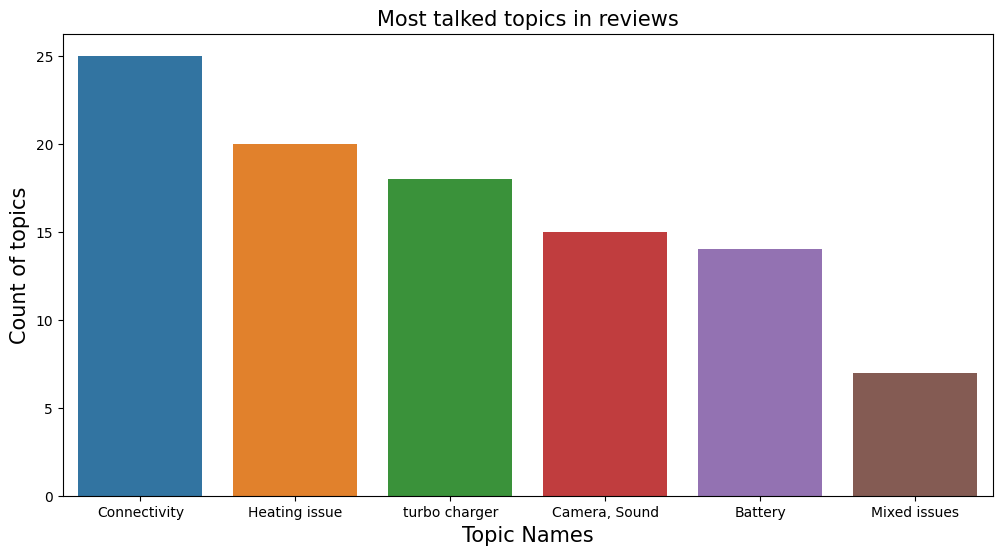

In [75]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[:6].index,y=review_data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

From above graph we can say that most of customers had issues with Battery of mobile

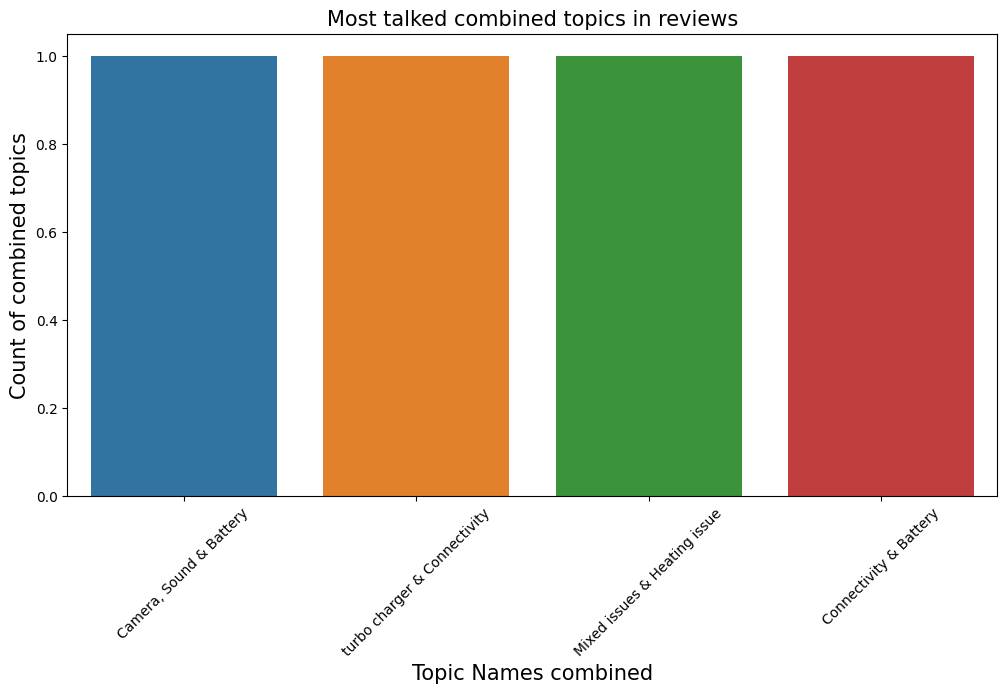

In [76]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[6:].index,y=review_data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

From above graph we can say that most of customers had combined issues with,

Heating issue & Battery <br>
Camera, Sound & Battery <br>
turbo charger & Battery

### Extracting reviews of 5 topic(review of battery)

In [77]:
review_data.loc[review_data.Topic_Number.str.contains('5'),['review','Topic_Name']].head(10)\
.style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
0,Great banking app with attractive interest rates! Please allow us to add and/or save payees so we don’t have to keep typing out UEN numbers or account numbers. Would be nice to be able to add the debit card to Apple Pay too!!,Battery
2,"Notice that the drop in interest rate of 0.8% in saving accounts. GXS just come out with a reason to say many consumers want a increase in interest rate in main accounts as most of their funds are there to get the 1.2x points for dash and grab spending. Hence they decrease the interest rate to 2.68% in saving account and increase to 2.38% in main account . The thing is GXS can increase the main account interest and maintain the interest rate in saving account. They will attract more consumer in this case. However, they use this opportunity to decease the interest rate in saving account instead and use the consumer as an excuse for the decrease. I am very disappointed in GXS and have close my account in GXS. There are other banks offering a higher interest rate such as OCBC and UOB for saving accounts. No point sticking to GXS.",Battery
3,"Sending money into my GXS account is a breeze and instantaneous - regardless of the amounts. I’m able to immediately see that my funds are in GXS. Transferring money OUT is a huge issue. Since June I’ve had problems transferring amounts higher than $500 back to my other banking accounts, each time a red banner will pop up and said something went wrong please try again later. TODAY I can’t transfer more than $1000 back to myself - even the $1000 had to be transferred in TWO transactions of $500 each. Customer service officers did their best to help each time but it’s annoying that the advice provided (killing the app, re-logging in with SingPass) still don’t work.",Battery
23,Easy drawing and repayment option. Flexible of choice at any time with any needs. Like it and good tool for emergency money with flexible borrowing and repayment.,Battery
30,No more long waits and tons of paperwork to open a bank account. Looking forward to how GXS can generate a stronger value proposition for consumers.,Battery
31,Like to use GXS apps that is link to Grabs apps for easy to transfer money from saving to topup Grabs account.,Battery
32,Best digital bank in my opinion I prefer this over its competitors:),"Camera, Sound & Battery"
44,"It doesn’t make the company look reputable when they offer a high interest rate only to drop it immediately after gaining enough users. It feels like a bait, which it is. They should acquire deposits through more honest and transparent methods.",Battery
45,Easy to use and log in! Very clean instruction.,Battery
52,"Personally don’t like the theme, anyway allow user to change more brighter one? Dark color me uncomfortable 😞",Battery


### Conclusion

1. We can combine topic number 2 (Heating issue),3 (turbo charger), 5(Battery) <br>
2. If lenovo company improves their turbo charger which is causing heating issues in battery, the mobile will be more appreciated by users.
3. We can try to use other POS tags to improve our model.